# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [6]:
# 1 - Monte uma bivariada para a variável sex com as seguintes estatísticas:

# Agrupar por 'sex' para obter as contagens solicitadas
bivariada = df.groupby('sex')['flag_doente'].agg(
    saudaveis=lambda x: (x == 0).sum(),
    doentes=lambda x: (x == 1).sum(),
    total='count',
    media_doentes='mean'
).reset_index()

# Calcular Odds (Doentes / Saudáveis)
bivariada['odds'] = bivariada['doentes'] / bivariada['saudaveis']

# Calcular Odds Ratio (OR) usando a média como referência
total_odds = bivariada['doentes'].sum() / bivariada['saudaveis'].sum()
bivariada['odds_ratio'] = bivariada['odds'] / total_odds

# Calcular o Logito (LOG(Odds))
bivariada['logito'] = np.log(bivariada['odds'])

# Calcular WOE (Weight of Evidence) = LOG(Odds Ratio)
bivariada['woe'] = np.log(bivariada['odds_ratio'])

# Exibir o resultado
print(bivariada)


   sex  saudaveis  doentes  total  media_doentes      odds  odds_ratio  \
0  0.0         72       25     97       0.257732  0.347222    0.409672   
1  1.0         92      114    206       0.553398  1.239130    1.461996   

    logito       woe  
0 -1.05779 -0.892398  
1  0.21441  0.379802  


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [8]:
# Categorizar a variável 'age' em 5 grupos
df['age_group'] = pd.cut(df['age'], bins=5, labels=['G1', 'G2', 'G3', 'G4', 'G5'])

# Exibir a distribuição dos grupos
df[['age', 'age_group']].groupby('age_group').count()


# Agrupar por grupos de idade e calcular as estatísticas
bivariada_age = df.groupby('age_group').agg(
    saudaveis=('flag_doente', lambda x: (x == 0).sum()),
    doentes=('flag_doente', lambda x: (x == 1).sum()),
    total=('flag_doente', 'count')
)

# Adicionar a média de doentes
bivariada_age['media_doentes'] = bivariada_age['doentes'] / bivariada_age['total']

# Calcular Odds
bivariada_age['odds'] = bivariada_age['doentes'] / bivariada_age['saudaveis']

# Calcular Odds Ratio usando o total como referência
odds_total = bivariada_age['doentes'].sum() / bivariada_age['saudaveis'].sum()
bivariada_age['odds_ratio'] = bivariada_age['odds'] / odds_total

# Calcular Logito (log das odds)
bivariada_age['logito'] = np.log(bivariada_age['odds'])

# Calcular WOE (Weight of Evidence)
bivariada_age['woe'] = np.log(bivariada_age['odds_ratio'])

# Adicionar a média de idade por grupo
bivariada_age['media_idade'] = df.groupby('age_group')['age'].mean()

# Exibir o resultado final
print(bivariada_age)


           saudaveis  doentes  total  media_doentes      odds  odds_ratio  \
age_group                                                                   
G1                 8        3     11       0.272727  0.375000    0.442446   
G2                50       21     71       0.295775  0.420000    0.495540   
G3                56       41     97       0.422680  0.732143    0.863823   
G4                40       67    107       0.626168  1.675000    1.976259   
G5                10        7     17       0.411765  0.700000    0.825899   

             logito       woe  media_idade  
age_group                                   
G1        -0.980829 -0.815437    35.181818  
G2        -0.867501 -0.702108    43.704225  
G3        -0.311780 -0.146387    53.567010  
G4         0.515813  0.681206    61.775701  
G5        -0.356675 -0.191282    70.529412  


<ipython-input-8-56b3508f8a97>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['age', 'age_group']].groupby('age_group').count()
<ipython-input-8-56b3508f8a97>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bivariada_age = df.groupby('age_group').agg(
<ipython-input-8-56b3508f8a97>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bivariada_age['media_idade'] = df.groupby('age_group')['age'].mean()


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

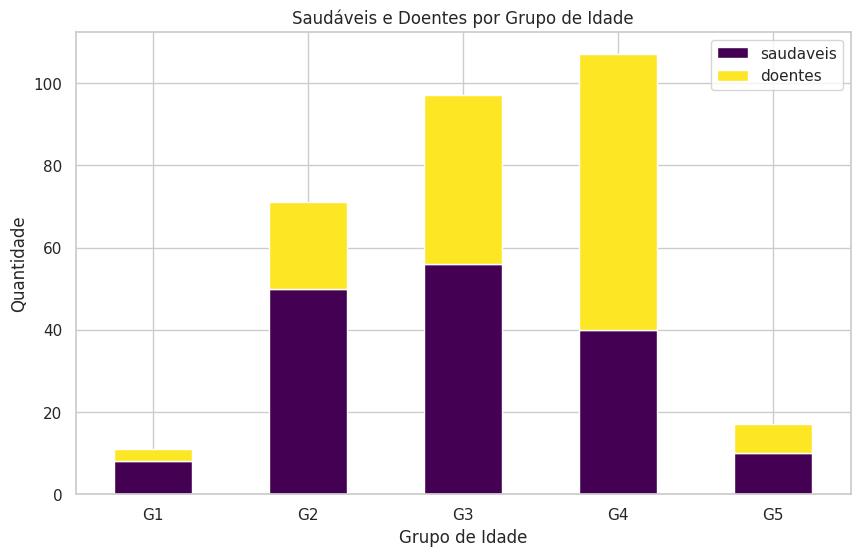

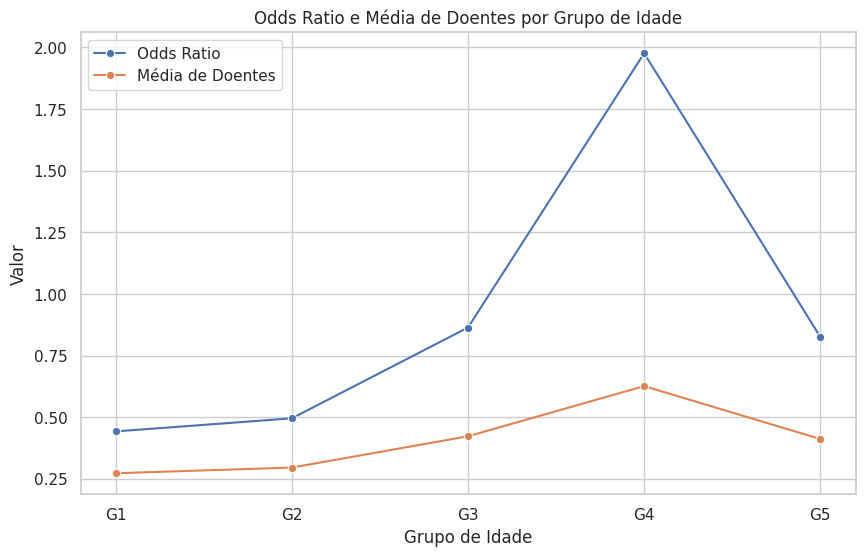

In [9]:

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico de Barras - Saudáveis vs Doentes por Grupo de Idade
fig, ax1 = plt.subplots(figsize=(10, 6))
bivariada_age[['saudaveis', 'doentes']].plot(kind='bar', stacked=True, ax=ax1, colormap='viridis')
ax1.set_title('Saudáveis e Doentes por Grupo de Idade')
ax1.set_xlabel('Grupo de Idade')
ax1.set_ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

# Gráfico de Linha - Odds Ratio e Média de Doentes por Grupo de Idade
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plotando Odds Ratio
sns.lineplot(data=bivariada_age, x=bivariada_age.index, y='odds_ratio', marker='o', label='Odds Ratio', ax=ax2)

# Plotando Média de Doentes
sns.lineplot(data=bivariada_age, x=bivariada_age.index, y='media_doentes', marker='o', label='Média de Doentes', ax=ax2)

ax2.set_title('Odds Ratio e Média de Doentes por Grupo de Idade')
ax2.set_xlabel('Grupo de Idade')
ax2.set_ylabel('Valor')
plt.legend()
plt.show()


# 📊 **Relatório para Políticas Públicas de Saúde – Análise por Faixa Etária**  

## **Introdução**  
Este relatório apresenta uma análise da saúde populacional com base em dados agrupados por faixa etária. O objetivo é fornecer subsídios para a formulação de **políticas públicas preventivas** e **ações de intervenção**, visando reduzir o impacto das doenças e melhorar a qualidade de vida da população.

---

## **Resumo dos Dados**  

| **Faixa Etária** | **Saudáveis** | **Doentes** | **Total** | **Proporção de Doentes (%)** | **Odds** | **Odds Ratio** | **WOE** | **Média de Idade** |
|------------------|--------------|------------|----------|------------------------------|----------|----------------|---------|-------------------|
| G1 (35.1 anos)   | 8            | 3          | 11       | 27.3                         | 0.375    | 0.44           | -0.82   | 35.18             |
| G2 (43.7 anos)   | 50           | 21         | 71       | 29.6                         | 0.42     | 0.50           | -0.70   | 43.70             |
| G3 (53.6 anos)   | 56           | 41         | 97       | 42.3                         | 0.73     | 0.86           | -0.15   | 53.57             |
| G4 (61.8 anos)   | 40           | 67         | 107      | 62.6                         | 1.68     | 1.98           | 0.68    | 61.77             |
| G5 (70.5 anos)   | 10           | 7          | 17       | 41.2                         | 0.70     | 0.83           | -0.19   | 70.53             |

---

## **Principais Resultados e Insights**  

### 🔴 **Faixas de Maior Risco (G4 e G3)**  
- **G4 (61 a 70 anos)** apresenta a maior proporção de doentes (62.6%) e odds de adoecimento mais altas (1.68).
- A transição de **G3 (53 a 61 anos) para G4** é crítica, com o risco quase dobrando.  
  - **Ação recomendada:** Aumentar o monitoramento de doenças crônicas, como **doenças cardiovasculares, diabetes e câncer**, a partir dos 50 anos.

### 🟠 **Alerta para Faixa G2 (43 a 53 anos)**  
- Embora o risco seja relativamente menor (29.6%), é um período chave para intervenções preventivas.  
  - **Ação recomendada:** Implementar campanhas de **check-ups preventivos** para evitar o agravamento de condições de saúde.

### 🟢 **Faixa Etária de Baixo Risco (G1: 35 a 43 anos)**  
- Esta faixa tem a menor proporção de doentes (27.3%) e odds baixas (0.37).  
  - **Ação recomendada:** Incentivar a **manutenção de hábitos saudáveis** para evitar a piora da saúde no envelhecimento.

### 🔵 **Idosos Saudáveis (G5: 70 anos ou mais)**  
- Apesar de ser um grupo com idade avançada, as odds de adoecimento (0.70) são mais baixas do que em G4.  
  - **Hipótese:** Sobrevivência dos mais saudáveis e possível influência de **mudanças de estilo de vida** ou **maior acesso a cuidados de saúde**.

---

## **Sugestões para Políticas Públicas**  

1. **Campanhas de Rastreamento para Doenças Crônicas**  
   - **Foco:** A partir dos **50 anos** (G3 e G4), com exames para hipertensão, diabetes e câncer.  
   - **Meta:** Reduzir a incidência de doenças e os custos hospitalares.

2. **Check-ups Anuais para Adultos de 40 a 50 Anos (G2)**  
   - Implementação de **programas gratuitos de saúde preventiva** para identificar condições silenciosas.

3. **Programas de Estilo de Vida Saudável para Jovens Adultos (G1)**  
   - Incentivos à **prática de esportes e alimentação saudável** para prevenir doenças futuras.  
   - **Meta:** Estender a vida saudável e retardar o aparecimento de doenças crônicas.

4. **Educação e Manutenção da Saúde para Idosos (G5)**  
   - Foco na **autonomia** e **qualidade de vida**, com apoio a práticas como **atividades físicas moderadas** e **grupos de convivência**.

---

## **Conclusão**  
Os dados demonstram que a saúde da população piora progressivamente entre os 50 e 60 anos, exigindo maior atenção pública. Políticas focadas em **prevenção precoce** e **monitoramento contínuo** são fundamentais para minimizar o impacto das doenças na população idosa e promover um envelhecimento saudável.  

A aplicação desses insights em campanhas e programas pode **reduzir a carga sobre o sistema de saúde**, melhorar a qualidade de vida e aumentar a longevidade saudável da população.

---

## **Próximos Passos**  
- Implementar um **dashboard de monitoramento em tempo real** para acompanhar a evolução dos indicadores de saúde por faixa etária.  
- Revisar a **infraestrutura de saúde** para garantir que as ações preventivas sejam aplicadas nos grupos identificados com maior risco.
